### Exploratory Data Analysis on COVID-19 Clinical Trials Dataset

### 1. Import libraries and modules. 

The libraries and modules used throughout the project are datetime, pandas, and regular expression for data manipulation, and matplotlib, seaborn and pandas tools for data visualization:

In [5]:
# import libraries and modules for data handling
from datetime import date
import pandas as pd
import re

# import libraries and modules for data visualization
import matplotlib.dates as mdates
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plotting
%matplotlib inline

### 2. Load data. 
The CSV (Comma Separated Value) file containing information about the clinical trials was loaded in a pandas DataFrame and inspected using method info(). 
The created DataFrame contains 5783 entries (rows) and 27 columns:

In [11]:
# Load CSV file with information about the clinical trials in a DataFrame
df_trials = pd.read_csv("covid_clinical_trials.csv")

# Inspect the dataframe
df_trials.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783 entries, 0 to 5782
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank                     5783 non-null   int64  
 1   NCT Number               5783 non-null   object 
 2   Title                    5783 non-null   object 
 3   Acronym                  2480 non-null   object 
 4   Status                   5783 non-null   object 
 5   Study Results            5783 non-null   object 
 6   Conditions               5783 non-null   object 
 7   Interventions            4897 non-null   object 
 8   Outcome Measures         5748 non-null   object 
 9   Sponsor/Collaborators    5783 non-null   object 
 10  Gender                   5773 non-null   object 
 11  Age                      5783 non-null   object 
 12  Phases                   3322 non-null   object 
 13  Enrollment               5749 non-null   float64
 14  Funded Bys              

### 3. Inspect missing values.

Missing values in the DataFrame are inspected as a sum and in percentage. 
The columns are then sorted in a descending order based on the total amount of missing data (here in percentage):

In [12]:
# Check for missing values
# Sum the number of missing values
# Sort the columns in a descending order based on the total number of missing 
## values
df_trials.isnull().sum().sort_values(ascending=False)
# Missing data in percentage
df_trials.isnull().mean().sort_values(ascending=False)*100

Results First Posted       99.377486
Study Documents            96.852845
Acronym                    57.115684
Phases                     42.555767
Interventions              15.320768
Locations                  10.115857
Completion Date             0.622514
Primary Completion Date     0.622514
Study Designs               0.605222
Outcome Measures            0.605222
Enrollment                  0.587930
Start Date                  0.587930
Gender                      0.172921
Other IDs                   0.017292
Last Update Posted          0.000000
First Posted                0.000000
Rank                        0.000000
Study Type                  0.000000
Funded Bys                  0.000000
NCT Number                  0.000000
Age                         0.000000
Sponsor/Collaborators       0.000000
Conditions                  0.000000
Study Results               0.000000
Status                      0.000000
Title                       0.000000
URL                         0.000000
d

Columns named ’Results First Posted’ and ’Study Documents’ contain 99.38 and 96.85 % of missing data, thus, they can be dropped. ’Acronym’ can also be removed since more than 50 % of the clinical trials do not contain one and they are better accessed/identified through their unique NCT number. Other columns which are not useful to the overall analysis and that can be dropped include: ’Conditions’, ’Outcome Measures’, ’Study Designs’, ’Other IDs’, ’Primary Completion Date’, ’First Posted’, ’Results First Posted’, ’Last Update Posted’, ’Study Documents’, and ’URL’. 

The new DataFrame contains 16 columns with missing values in percentage as follows:

In [17]:
# Drop colums which are unneccessary for the data analysis
df_updated = df_trials.drop(['Acronym', 'Conditions', 'Outcome Measures', 
                               'Study Designs', 'Other IDs', 
                               'Primary Completion Date', 'First Posted', 
                               'Results First Posted', 'Last Update Posted', 
                               'Study Documents', 'URL'], axis=1)
# Shape of the updated dataframe
df_updated.shape                         # 16 columns and 5873 row entries 
df_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783 entries, 0 to 5782
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rank                   5783 non-null   int64  
 1   NCT Number             5783 non-null   object 
 2   Title                  5783 non-null   object 
 3   Status                 5783 non-null   object 
 4   Study Results          5783 non-null   object 
 5   Interventions          4897 non-null   object 
 6   Sponsor/Collaborators  5783 non-null   object 
 7   Gender                 5773 non-null   object 
 8   Age                    5783 non-null   object 
 9   Phases                 3322 non-null   object 
 10  Enrollment             5749 non-null   float64
 11  Funded Bys             5783 non-null   object 
 12  Study Type             5783 non-null   object 
 13  Start Date             5749 non-null   object 
 14  Completion Date        5747 non-null   object 
 15  Loca

In [16]:
# Explore missing values left in the updated dataframe
df_updated.isnull().sum().sort_values(ascending=False)

Phases                   2461
Interventions             886
Locations                 585
Completion Date            36
Enrollment                 34
Start Date                 34
Gender                     10
Rank                        0
NCT Number                  0
Title                       0
Status                      0
Study Results               0
Sponsor/Collaborators       0
Age                         0
Funded Bys                  0
Study Type                  0
dtype: int64

In [15]:
# Mising data in the updated dataframe in percentage
df_updated.isnull().mean().sort_values(ascending=False)*100

Phases                   42.555767
Interventions            15.320768
Locations                10.115857
Completion Date           0.622514
Enrollment                0.587930
Start Date                0.587930
Gender                    0.172921
Rank                      0.000000
NCT Number                0.000000
Title                     0.000000
Status                    0.000000
Study Results             0.000000
Sponsor/Collaborators     0.000000
Age                       0.000000
Funded Bys                0.000000
Study Type                0.000000
dtype: float64

### 4. Handle missing values and clean the data. 

At this stage, missing values are inspected for each column and then the columns are cleaned if necessary. 

**Column 'Gender'**

Column ’Gender’ contains 10 missing values (0.17 %). 
Since 10 clinical trials didn’t not report the specific gender on which they were conducting the studies, I have filled the missing data with ’Not Specified’. 

In [18]:
# Check for missing values in a specific column
df_updated['Gender'].isnull().sum()                     # 10 missing values   

10

In [19]:
# Filling the missing values with 'Not Specified'
df_updated.Gender = df_updated.Gender.fillna('Not Specified')
# Check again for missing values
df_updated['Gender'].isnull().sum()                     # 0 missing values

0

Now this column contains four unique categories in which the entries ’All’ have been replaced with ’All genders’ to make it more explicit:
* All genders (5567)
* Female (162)
* Male (44)
* Not specified (10)

In [20]:
# Explore unique values / categories 
df_updated['Gender'].unique()
# Replace 'All' with 'All Genders' to make it more explicit 
df_updated['Gender'] = df_updated['Gender'].replace(['All'], 'All Genders')
# How many studies were conducted in each category?
df_updated['Gender'].value_counts()  

All Genders      5567
Female            162
Male               44
Not Specified      10
Name: Gender, dtype: int64

**Column 'Start Date'**

Column ’Start Date’ contains 34 missing values (0.59 %). This percentage is to small to have a significant impact on the overall analysis which includes any progression in time. Therefore, the missing values can be removed. To make sure that no other useful data is lost from this removal, the dataframe containing no-null values for the start date is copied into another one.

Coincidentally, all the 34 missing values from the ’Start Date’ column correspond to the study type ’Expanded Access’, amounting to 34 as well. This means that by removing the 34 missing start dates we also get rid of the category ’Expanded Access’ and, thus, result in a false interpretation of the data when exploring the different categories for the type of studies conducted.

Furthermore, the start dates are stored as strings. For efficiency, the dates are converted to datetime format to
make use of pandas built-in time series tools and data algorithms.

In [21]:
# Check for missing values in a specific column
df_updated['Start Date'].isnull().sum()         # 34 missing values
df_updated['Start Date'].isnull().mean()*100    # 0.59 % missing values

0.5879301400657099

In [23]:
# Copy the data with non-null values in a new dataframe 
df_startdt = df_updated[df_updated['Start Date'].notnull()].copy()

# Check again for missing values  
df_startdt['Start Date'].isnull().sum()         # 0 missing values

0

In [24]:
# Dates are stored as strings in the dataframe
type(df_startdt['Start Date'][9])

# Converting string dates to datetime format 
df_startdt['Start Date'] = pd.to_datetime(df_updated['Start Date'])
df_startdt['Start Date']                        # dtype: datetime64[ns]
df_startdt['Start Date'][0]                     # Timestamp

Timestamp('2020-11-09 00:00:00')

**Column ’Locations’**

This column contains 585 missing values (10 %) which are filled and grouped in a separated category ’Unknown’.

In [25]:
# Check for missing values in a specific column
df_updated['Locations'].isnull().sum()          # 585 missing values
df_updated['Locations'].isnull().mean()*100     # 10% missing locations

10.11585682171883

In [30]:
# Fill and group the missing locations in a separate category with 'Unknown'   
df_updated.Locations = df_updated.Locations.fillna('Unknown')
# Check again for missing values
df_updated['Locations'].isnull().sum()  

0

 Each entry in this column is unique, and given in the format such that the country name is specified at the end.

In [31]:
# Explore unique values / categories 
df_updated['Locations'].unique                  # 5783 unique values

<bound method Series.unique of 0       Groupe Hospitalier Paris Saint-Joseph, Paris, ...
1            Cimedical, Barranquilla, Atlantico, Colombia
2       Ospedale Papa Giovanni XXIII, Bergamo, Italy|P...
3       Hong Kong Sanatorium & Hospital, Hong Kong, Ho...
4                            CHR Orléans, Orléans, France
                              ...                        
5778    UW Health at the American Center, Madison, Wis...
5779    Die Filderklinik, Filderstadt, Baden-Württembe...
5780    University of Illinois at Urbana-Champaign, Ur...
5781    Mental Health Services in the Capital Region, ...
5782    Uniformed Services University for the Health S...
Name: Locations, Length: 5783, dtype: object>

In [32]:
# Format of the given locations
for i in range(2):
    print(i, df_updated.loc[i, 'Locations'])    # country name specified at the end 

0 Groupe Hospitalier Paris Saint-Joseph, Paris, Ile De France, France
1 Cimedical, Barranquilla, Atlantico, Colombia


To select the country, the following procedure has been followed (country names stored in a separate column ’Country’):

In [35]:
# Split at "," using the str.split() function
# Select last element, str[-1]
# Remove any existing spaces using the str.strip() function
# Store the country names in a separate column in the dataframe
df_updated["Country"] = df_updated['Locations'].str.split(",").str[-1].str.strip()
df_updated["Country"]

0              France
1            Colombia
2          San Marino
3           Hong Kong
4              France
            ...      
5778    United States
5779          Germany
5780    United States
5781          Denmark
5782    United States
Name: Country, Length: 5783, dtype: object

In [36]:
# Check the columns of the updated dataframe  
df_updated.columns                                # contains 17 columns

Index(['Rank', 'NCT Number', 'Title', 'Status', 'Study Results',
       'Interventions', 'Sponsor/Collaborators', 'Gender', 'Age', 'Phases',
       'Enrollment', 'Funded Bys', 'Study Type', 'Start Date',
       'Completion Date', 'Locations', 'Country'],
      dtype='object')

**Column ’Interventions’**

This column contains 886 missing values (15 %). This number is too large to be dropped or grouped together with any other category as it may lead to biased results, therefore, the missing entries are filled with ’Not Specified’.

In [37]:
# Check for missing values in a specific column
df_updated['Interventions'].isnull().sum()          # 886 missing values
df_updated['Interventions'].isnull().mean()*100     # 15% missing entries

15.320767767594672

In [38]:
# Fill and group the missing intervention types in a separate category with
## 'Not Specified'   
df_updated['Interventions'] = df_updated['Interventions'].fillna('Not Specified')
# Check again for missing values
df_updated['Interventions'].isnull().sum()

0

The format on which  the interventions are reported include the type of intervention at the beginning, followed by ”:” and more specific details.

In [39]:
# Explore unique values / categories 
df_updated['Interventions'].unique()

array(['Diagnostic Test: ID Now™ COVID-19 Screening Test',
       'Drug: Drug COVID19-0001-USR|Drug: normal saline',
       'Other: Lung CT scan analysis in COVID-19 patients', ...,
       'Other: Antibiotic treatment|Other: No antibiotic treatment',
       'Behavioral: Yoga',
       'Behavioral: Brief Cognitive Behavioral Therapy for Chronic Pain (BCBT-CP)|Other: BCBT-CP Booster'],
      dtype=object)

In [40]:
# Split at ":" and select the first element for the intervention type
df_updated['Interventions'] = df_updated['Interventions'].str.split(":").str[0].str.strip()
df_updated['Interventions'].unique()

array(['Diagnostic Test', 'Drug', 'Other', 'Biological', 'Behavioral',
       'Not Specified', 'Genetic', 'Device', 'Dietary Supplement',
       'Procedure', 'Combination Product', 'Radiation'], dtype=object)

In [41]:
len(df_updated['Interventions'].unique())           # 12 intervention types

12

**Column ’Age’**

This column contains no missing entries and 415 unique values in the format:

In [42]:
# Explore unique values / categories 
len(df_updated['Age'].unique())
# There are 415 unique categories
# Format of the age entries
for i in range(5):
    print(i, df_updated.loc[i, 'Age'])

0 18 Years and older   (Adult, Older Adult)
1 18 Years and older   (Adult, Older Adult)
2 18 Years and older   (Adult, Older Adult)
3 Child, Adult, Older Adult
4 18 Years to 48 Years   (Adult)


I defined a function to extract the age group:

In [43]:
def age_group(age):
    '''
    age_group function extracts the age group from a string data.
    
    The age group should be specified either in parentheses or the string data 
    should contain one of the following categories: Child, Adult, Older.
    
    :age:       string data containing information about the age group
    :return:    age group or None (if no age group is found) 
    
    '''
    if re.findall(r'\(.*\)', age):
        # this return a list, so I slice its only element
        age = re.findall(r'\(.*\)', age)[0]
        # getting rid of the parentheses 
        return re.sub(r"\(|\)", "", age)
    elif re.findall(r"\bChild\b|\bAdult\b|\bOlder\b", age):
        return age
    else:
        return None

In [45]:
# Apply a function to each element in the 'Age' column to extract the age group
# Store the resulting entries in a new column 
df_updated['Age Group'] = df_updated.Age.apply(lambda x : age_group(x)) 
df_updated['Age Group'].unique() 

array(['Adult, Older Adult', 'Child, Adult, Older Adult', 'Adult',
       'Child', 'Child, Adult', 'Older Adult'], dtype=object)

In [46]:
len(df_updated['Age Group'].unique())

6

There are 6 categories:
* Adult, Older Adult, 
* Child, Adult, Older Adult,
* Adult,
* Child,
* Child, Adult,
* Older Adult

**Column ’Study Type’**

This column contains no missing values and three main categories: Interventional, Observational, and Expanded Access. 

For the last group, a more detailed information is given in the format ’Expanded Access: more information’. To simplify it and group these entries in a single category the data has been cleaned as follows.

In [48]:
# Explore unique values / categories 
df_updated['Study Type'].unique()
# There are three unique type of studies: Interventional, Observational,
# and Expanded Access. The last one contains more information and should be cleaned.

array(['Interventional', 'Observational',
       'Expanded Access:Treatment IND/Protocol',
       'Expanded Access:Individual Patients|Intermediate-size Population',
       'Expanded Access:Intermediate-size Population',
       'Expanded Access:Intermediate-size Population|Treatment IND/Protocol',
       'Expanded Access',
       'Expanded Access:Individual Patients|Treatment IND/Protocol',
       'Expanded Access:Individual Patients'], dtype=object)

In [49]:
# Create a single category 'Expanded Access' by replacing 
## 'Expanded Access + more' with 'Expanded Access'
df_updated['Study Type'] = df_updated['Study Type'].apply(
    lambda x: 'Expanded Access' if 'Expanded Access' in x else x)

df_updated['Study Type'].unique()

array(['Interventional', 'Observational', 'Expanded Access'], dtype=object)

### 5. Plot the data. 

#### Time-based analysis

To work with time series, specifically, to analyse when the clinical trials started, the index of the dataframe has been set as the start date, and the start dates have been grouped by year and month using the resample() method:

In [50]:
# Set the start date time series as an index of the dataframe 
df_indexdt = df_startdt.set_index('Start Date')

# Group by / Resample data by year 
df_year = df_indexdt.resample('Y', kind='period').count()

# Group by / Resample data by month
df_month = df_indexdt.resample('M', kind='period').count()

In [55]:
df_year.head(3)

,Rank,NCT Number,Title,Status,Study Results,Interventions,Sponsor/Collaborators,Gender,Age,Phases,Enrollment,Funded Bys,Study Type,Completion Date,Locations
Start Date,,,,,,,,,,,,,,,
1998,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0
1999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [56]:
df_month.head(3)

,Rank,NCT Number,Title,Status,Study Results,Interventions,Sponsor/Collaborators,Gender,Age,Phases,Enrollment,Funded Bys,Study Type,Completion Date,Locations
Start Date,,,,,,,,,,,,,,,
1998-01,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0
1998-02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1998-03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


The progression by year has been plotted using pandas tools for visualization, whereas the
specific details of the plot (e.g., the axis labels, title of the plot, etc.) have been set using matplotlib:

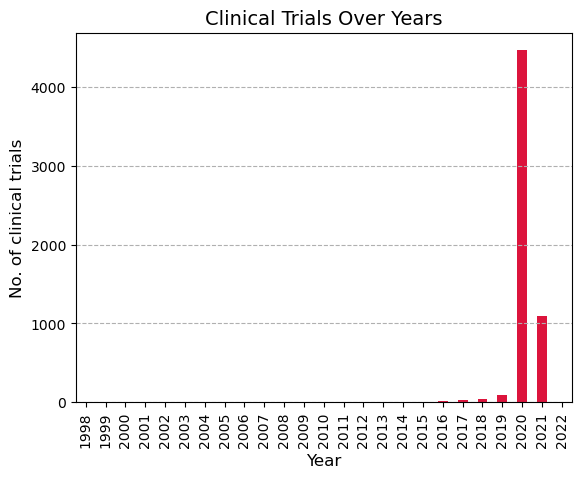

In [59]:
# Reset the matplotlib parametrs to default
mpl.rcParams.update(mpl.rcParamsDefault)

# Plot with pandas visualization tools and matplotlib
fig = plt.figure()
ax = fig.gca() 
df_year.plot(y='Rank', kind='bar', ax=ax, color='crimson', legend=None)

# Display horizontal grid 
plt.grid(visible=True, which='major', axis='y', linestyle='--')

# Set labels for the X- and Y-axis
plt.xlabel('Year', fontsize=12)
plt.ylabel('No. of clinical trials', fontsize=12)
# Set figure title 
plt.title('Clinical Trials Over Years', fontsize=14)
plt.show()

The progression by month has been plotted using matplotlib and an axis grid. Note that here the modules matplotlib.dates as mdates and date from datetime have been used to format the tick labels and axis limit.

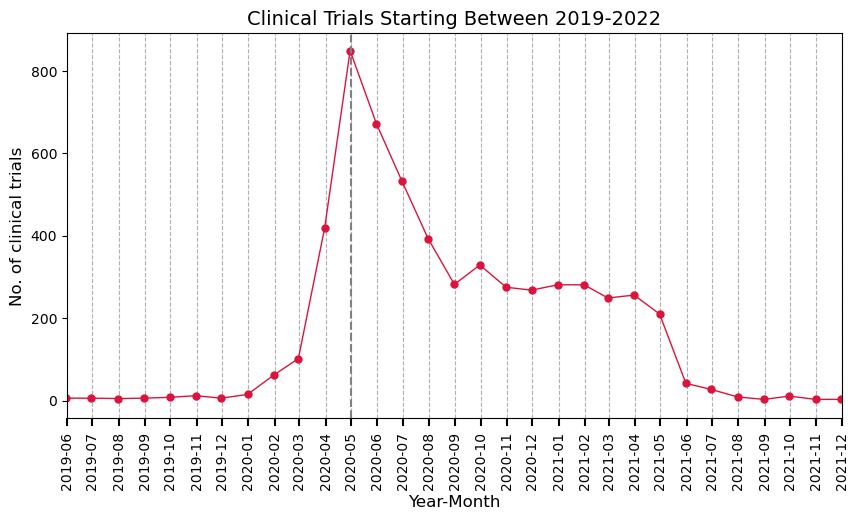

In [60]:
# Plot with matplotlib
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot_date(x=df_month.index, y=df_month['Rank'], color='crimson', 
             markerfacecolor='crimson', markeredgecolor='crimson', markersize=5,
             linestyle='-', linewidth=1 )

# Set axis limit
ax.set_xlim([date(2019, 6, 1), date(2021, 12, 1)])

# Format ticks in the X-axis 
# Tick labels in the X-axis will be displayed in 'YYYY-mm' format
xfmt = mdates.DateFormatter('%Y-%m')
# Set major ticks every month
ax.xaxis.set_major_formatter(xfmt)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
# Set parameters for the appearance of the major ticks: width and size
ax.xaxis.set_tick_params(size=6 , width=1.5, which='major')
# Rotate the tick labels in the X-axis by 90 degrees
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)

# Display vertical grid 
ax.grid(visible=True, which='major', axis='x', linestyle='--')
# Display vertical dashed and darker line at the maximum 
ax.axvline(date(2020, 5, 1), color='grey', linestyle='--')

# Set labels for the X- and Y-axis
ax.set_xlabel('Year-Month', fontsize=12)
ax.set_ylabel('No. of clinical trials', fontsize=12)
# Set figure title 
ax.set_title('Clinical Trials Starting Between 2019-2022', fontsize=14)

plt.show()

#### Locations

For the top 10 locations, a pie chart from matplotlib has been used. To make the slices more visible and to avoid overlapping of the values the explode argument has been specified. The percentages have been calculated by calling the argument autopct of the pie chart, which has been extended to display the count number:

In [61]:
# Slicing the top 10 Locations where the clinial trials took place
top_countries = df_updated.Country.value_counts().iloc[:10]
print(top_countries)

United States     1267
France             647
Unknown            585
United Kingdom     306
Italy              235
Spain              234
Turkey             219
Canada             202
Egypt              192
China              171
Name: Country, dtype: int64


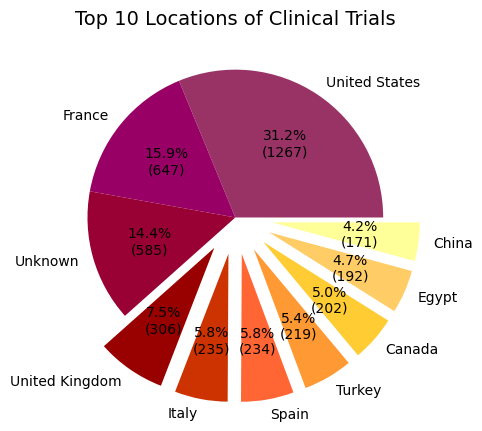

In [62]:
# Format the labels of the pie sections: display percentage and value_counts  
# Use decorators to extend already an existing function 
def autopct_format(values):
    def my_format(percentage):
        '''
        my_format() extends the autopct_format() function to display
        value_counts using string formatting, in additon to the percentage.
        
        '''
        total = sum(values)
        value_cnt = int(round(percentage*total/100.0))
        return '{0:.1f}%\n({1:d})'.format(percentage, value_cnt)
    return my_format

# Define colors of the pie sections
colors = ['#993366','#990066','#990033','#990000','#CC3300','#FF6633','#FF9933','#FFCC33','#FFCC66','#FFFF99']
explode = (0, 0, 0, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25)
plt.pie(top_countries.values, labels=top_countries.index, explode=explode,
        autopct=autopct_format(top_countries.values), colors=colors)

# Set figure title 
plt.title('Top 10 Locations of Clinical Trials', fontsize=14)

plt.show()

The rest have been plotted using countplot from seaborn and and axis grid.

#### Type of studies

The Interventional study type dominates, followed by the observational, and lastly by the Expanded Access (only 34 studies conducted).

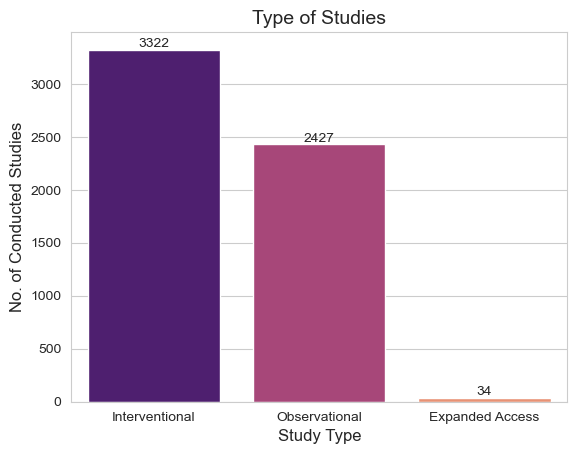

In [63]:
# Plot with seaborn axis grid
# Set seaborn style
sns.set_style('whitegrid')
ax = sns.countplot(data=df_updated, x="Study Type", palette="magma")

# Display value_count on top of the bars
ax.bar_label(ax.containers[0])

# Set labels for the X- and Y-axis
ax.set_xlabel('Study Type', fontsize=12)
ax.set_ylabel('No. of Conducted Studies', fontsize=12)
# Set figure title 
ax.set_title('Type of Studies', fontsize=14)

plt.show()

I will focus now on the Inerventional vs. Observational types and explore the participants by gender.

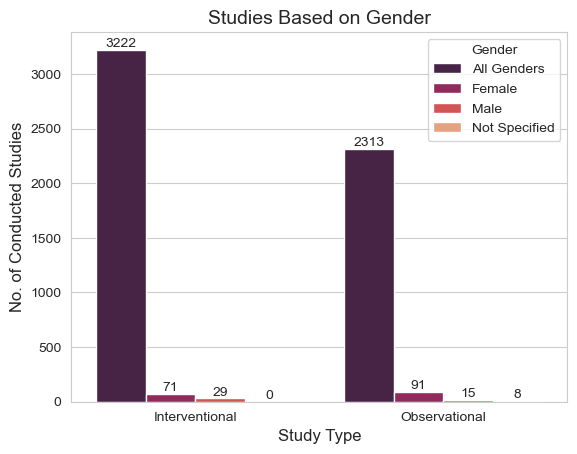

In [64]:
# Make a copy of the dataframe, slicing the 'Expanded Accces' study type out  
df_study = df_updated[df_updated['Study Type'] != 'Expanded Access'].copy()  
df_study['Study Type'].unique()             

# Plot with seaborn axis grid
ax = sns.countplot(data=df_study, x="Study Type", hue='Gender', palette='rocket')
# Display value_count on top of the bars
for i in range(0, len(df_updated['Gender'].unique())):
    ax.bar_label(ax.containers[i])

# Set labels for the X- and Y-axis
ax.set_xlabel('Study Type', fontsize=12)
ax.set_ylabel('No. of Conducted Studies', fontsize=12)
# Set figure title 
ax.set_title('Studies Based on Gender', fontsize=14)

plt.show()

For both types (interventional and observational) most of the studies have been conducted for all genders. However, there are more studies conducted for females than for males, and only very small number or studies did not record or specify the gender.

#### Age categories

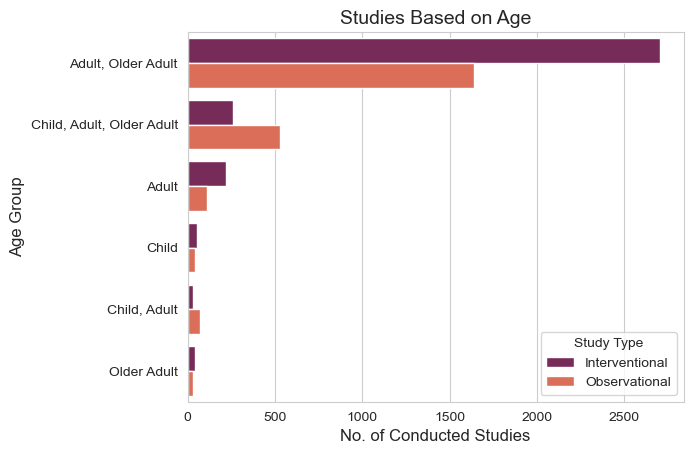

In [65]:
# Plot with seaborn axis grid
ax = sns.countplot(data=df_study, y='Age Group', hue='Study Type', palette='rocket')   

# Set labels for the X- and Y-axis
ax.set_xlabel('No. of Conducted Studies', fontsize=12)
ax.set_ylabel('Age Group', fontsize=12)
# Set figure title 
ax.set_title('Studies Based on Age', fontsize=14)
 
plt.show()

#### Most common treatments

Administration of drugs is the type of interventions that dominates.

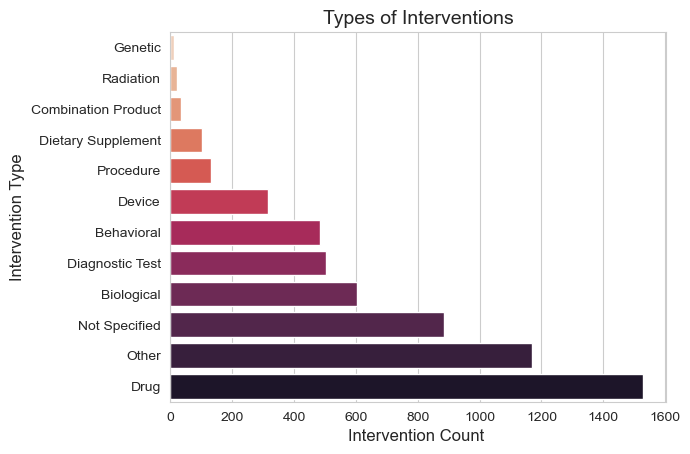

In [66]:
# Sort intervention types ascending
sorted_intv = df_updated['Interventions'].value_counts().sort_values(ascending=True)
sorted_intv

# Plot with seaborn with axis grid
sns.set_style('whitegrid')
ax = sns.countplot(data=df_updated, y='Interventions', palette='rocket_r',
                   order=sorted_intv.index)

# Set labels for the X- and Y-axis
ax.set_xlabel('Intervention Count ', fontsize=12)
ax.set_ylabel('Intervention Type', fontsize=12)
# Set figure title 
ax.set_title('Types of Interventions', fontsize=14)
plt.show()